In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


[]

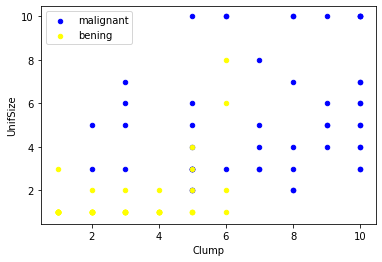

In [6]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='malignant');
df[df['Class'] == 2 ][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='yellow',label='bening',ax =ax);
plt.plot()

In [8]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [9]:
# here BareNuc may contain some unfilled feilds so we can drop those feilds

In [12]:
df = df[pd.to_numeric(df['BareNuc'] , errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int64') 
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [15]:
X = np.asarray(df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']])
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [16]:
Y = np.asarray(df['Class'])
Y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2)

In [19]:
from sklearn import svm
svm

<module 'sklearn.svm' from 'c:\\users\\flash\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\sklearn\\svm\\__init__.py'>

In [21]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(train_x,train_y)

c:\users\flash\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
yhat = SVM.predict(test_x)
yhat[0:5]

array([4, 4, 4, 4, 4], dtype=int64)

In [23]:
test_y[0:5]

array([4, 4, 4, 4, 4], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(test_y,yhat))
print(classification_report(test_y,yhat))

[[81  3]
 [ 0 53]]
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        84
           4       0.95      1.00      0.97        53

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



In [27]:
from sklearn.metrics import accuracy_score,r2_score
print(accuracy_score(yhat,test_y))  # this is the accuracy score


0.9781021897810219


In [28]:
# we can also try other kernels 

In [29]:
SVM = svm.SVC(kernel='linear')
SVM.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
yhat = SVM.predict(test_x)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(test_y,yhat))
print(classification_report(test_y,yhat))

[[83  1]
 [ 2 51]]
              precision    recall  f1-score   support

           2       0.98      0.99      0.98        84
           4       0.98      0.96      0.97        53

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



In [32]:
from sklearn.metrics import accuracy_score,r2_score
print(accuracy_score(yhat,test_y))  # this is the accuracy score


0.9781021897810219
